In [1]:
# all library imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
# check if tensorflow works with CUDA
tf.test.is_built_with_cuda()

True

In [3]:
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
# more imports
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [5]:
# model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [6]:
# add new layers
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [7]:
# more imports
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# classifier layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
__________________________________________________

In [10]:
from keras.utils import to_categorical

# get the MNIST data set
mnist = tf.keras.datasets.mnist
# load data and divide
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


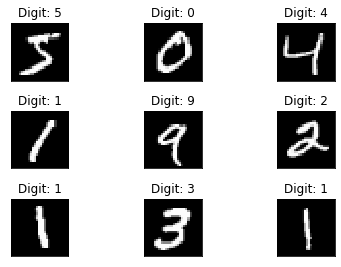

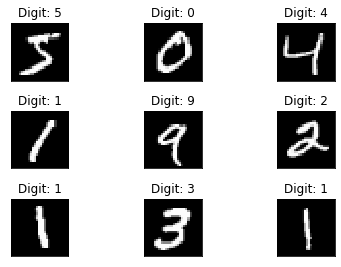

In [11]:
# view the data
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])
    
fig

In [12]:
print("Training images:\n{}".format(train_images.shape))
print("Training labels:\n{}".format(train_labels.shape))

# reshape the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("\nAfter reshaping...")
print("Training images:\n{}".format(train_images.shape))
print("Training labels:\n{}".format(train_labels.shape))

Training images:
(60000, 28, 28)
Training labels:
(60000,)

After reshaping...
Training images:
(60000, 28, 28, 1)
Training labels:
(60000, 10)


In [14]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# check time taken on the GPU for training and testing
import datetime as dt
start = dt.datetime.now()

# train the model on training data
model.fit(train_images, train_labels, batch_size=100, epochs=5, verbose=1)

# validate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
end = dt.datetime.now()

print('Test accuracy: {}'.format(test_acc))
print('\nTime taken on the GPU: {}'.format(end - start))

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1151 - accuracy: 0.9656
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1027 - accuracy: 0.9697
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0937 - accuracy: 0.9728
Epoch 4/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0862 - accuracy: 0.9748
Epoch 5/5
10000/10000 [==============================] - 1s 97us/sample - loss: 0.0694 - accuracy: 0.9780
Test accuracy: 0.9779999852180481

Time taken on the GPU: 0:00:13.424988
